In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
cars = pd.read_csv('Case_study_CarPrice_Assignment.csv') 
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##### Các thuộc tính Category
- 'CarName'
- 'carbody'
- 'fueltype'
- 'symboling'
- 'enginetype'
- 'doornumber'
- 'aspiration'
- 'cylindernumber'
- 'enginelocation'
- 'fuelsystem'
- 'drivewheel'

##### Các thuộc tính định lượng
- 'carlength'
- 'carwidth'
- 'carheight'
- 'curbweight'
- 'enginesize'
- 'boreratio'
- 'stroke'
- 'compressionratio'
- 'horsepower'
- 'peakrpm'
- 'wheelbase'
- 'citympg'
- 'highwaympg'

In [4]:
cars['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

- Nhận thấy chưa có cột company, nhưng tên hãng xe là từ đầu tiên trong tên xe

In [5]:
companies = cars['CarName'].apply(lambda x: x.split(' ')[0])
companies.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- Có một số lỗi nhập liệu

In [6]:
cars.insert(3,'company',companies)
cars.head()

,car_ID,symboling,CarName,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
def replace_name(after, before):
    for i in range(0,len(after)):
        a = after[i]
        b = before[i]
        cars.company.replace(b,a,inplace=True)

In [8]:
b = ['maxda','porcshce','toyouta','vokswagen','vw']
a = ['mazda','porsche','toyota','volkswagen','volkswagen']
replace_name(a,b)
print(cars.company.unique())
print(f'Sau khi sử lý còn lại {len(cars.company.unique())} hãng xe')

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Sau khi sử lý còn lại 23 hãng xe


In [9]:
count = 0
for isdup in cars.duplicated():
    if isdup:
        print (count,isdup,sep='\t')
    count +=1

- Không có hàng nào trùng nhau

### 1. Giá xe

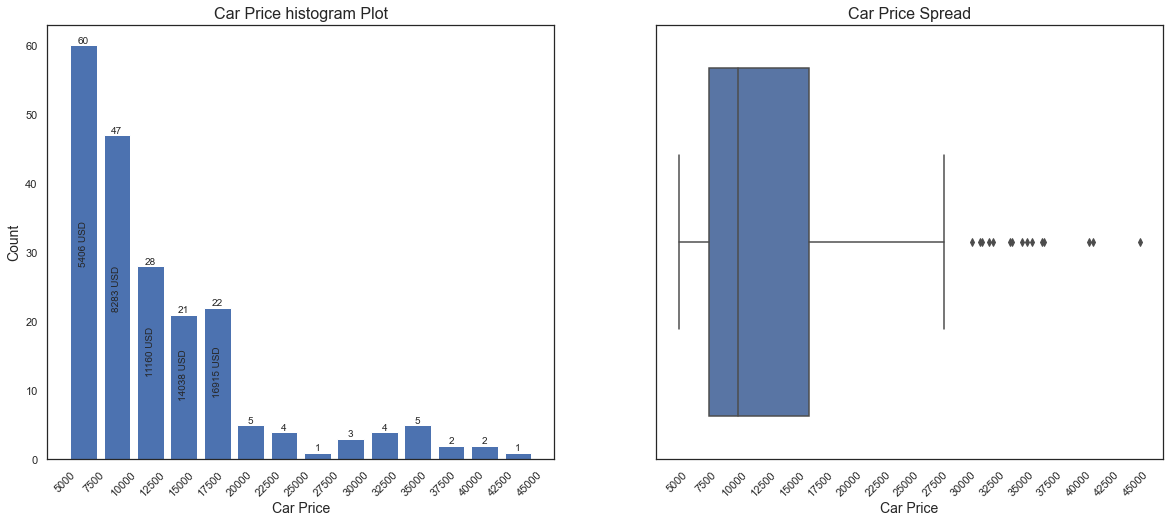

In [10]:
sns.set_theme(style = 'white')

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Price histogram Plot',fontsize = 16)
n, bins, patches = plt.hist(cars.price,bins = 14,rwidth = 0.8,align='mid')
plt.xticks([i for i in range(5000,47500,2500)],rotation = 45)
plt.xlabel('Car Price',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
for i in range(len(patches)):
    patch = patches[i]
    height = patch.get_height()
    v = patch.get_x()
    plt.text(patch.get_x() + patch.get_width()/2, height, str(int(height)), ha='center', va='bottom')
    if height>20:
        plt.text(patch.get_x() + patch.get_width()/2, height/2-2, str(int(round(v,0))) + ' USD', ha='center', va='bottom',rotation=90)

plt.subplot(1,2,2) 
plt.title('Car Price Spread',fontsize = 16) 
sns.boxplot(x=cars.price)
plt.xticks([i for i in range(5000,47500,2500)],rotation = 45)
plt.xlabel('Car Price',fontsize = 14)
plt.show()

In [11]:
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

- Độ lệch chuẩn ~ 8000 chiếc
- Giá trung bình khoảng 13000 USD/ chiếc
- Tập trung ở phân khúc giá rẻ nhiều (5000-10000 USD/chiếc)
- Phân khúc tầm trung khoảng 10000-20000 USD/chiếc

### 2. Các thuộc tính category

In [12]:
car_count = cars.company.value_counts().to_dict()
v = cars.groupby(['company','fueltype'])['fueltype'].count().to_dict()
di_dict = {}
gas_dist = {}
for i in v.keys():
    if i[1] == 'diesel':
        di_dict[i[0]] = v.get(i)
    else:
        if i[0] not in list(di_dict.keys()):
            di_dict[i[0]] = 0

    if i[1] == 'gas':
        gas_dist[i[0]] = v.get(i)
    else:
        if i[0] not in list(gas_dist.keys()):
            gas_dist[i[0]] = 0

list_company = list(car_count.keys())
di_dict = {i : di_dict[i] for i in list_company}
gas_dist = {i : gas_dist[i] for i in list_company}

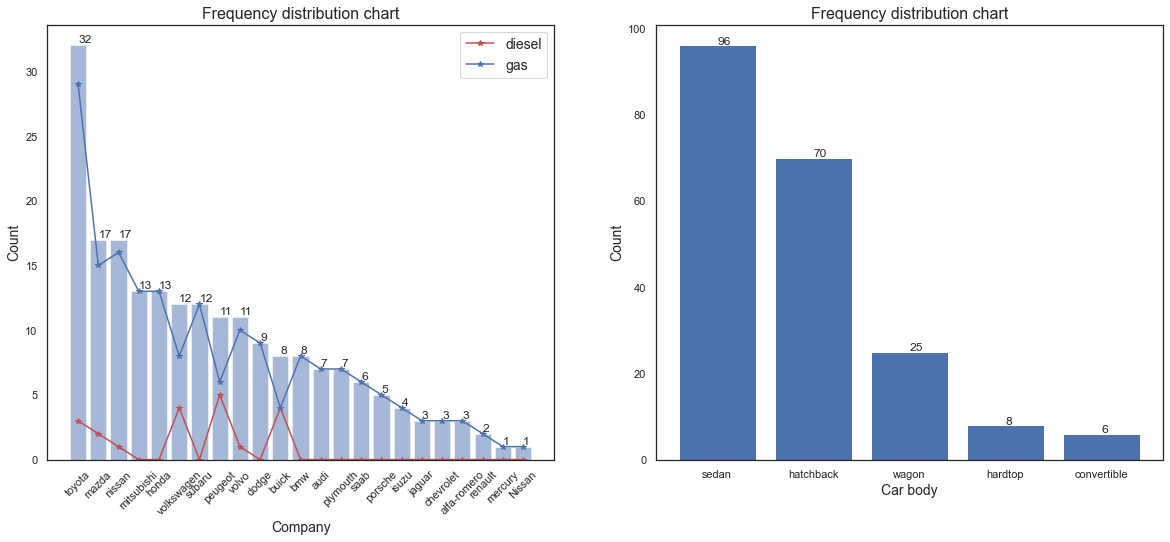

In [13]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 

pathcher = plt.bar(list(car_count.keys()),list(car_count.values()),alpha = 0.5)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.plot(list(car_count.keys()),list(di_dict.values()),label = 'diesel',color='r',marker = '*')
plt.plot(list(car_count.keys()),list(gas_dist.values()),label = 'gas',color='b',marker = '*')
plt.title('Frequency distribution chart',fontsize = 16)
plt.xlabel('Company',fontsize = 14)
plt.xticks(rotation=45)
plt.ylabel('Count',fontsize = 14)
plt.legend(fontsize = 14,loc = 'upper right')

plt.subplot(1,2,2) 
carbody_count = cars.carbody.value_counts().to_dict()
pathcher =plt.bar(list(carbody_count.keys()),list(carbody_count.values()))
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.title('Frequency distribution chart',fontsize = 16)
plt.xlabel('Car body',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.show()


In [14]:
carbody_ser = cars.groupby(['carbody'])['price'].mean().sort_values()
company_ser = cars.groupby(['company'])['price'].mean().sort_values()
fueltype_ser = cars.groupby(['fueltype'])['price'].mean().sort_values()

In [15]:
def show_barchart(seri,chartname,xlabel,ylabel,rotation = 0):
    plt.figure(figsize=(6,6))
    plt.bar(list(seri.index),list(seri.values))
    plt.title(chartname,fontsize = 16)
    plt.xlabel(xlabel,fontsize = 14)
    plt.ylabel(ylabel,fontsize = 14)
    plt.xticks(rotation = rotation)
    plt.show()

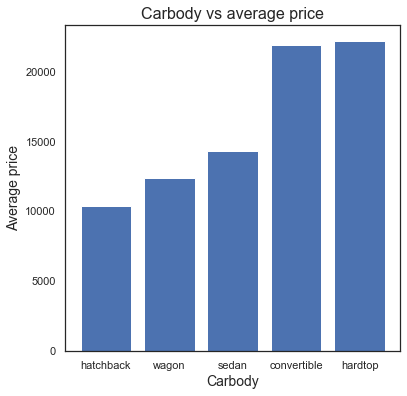

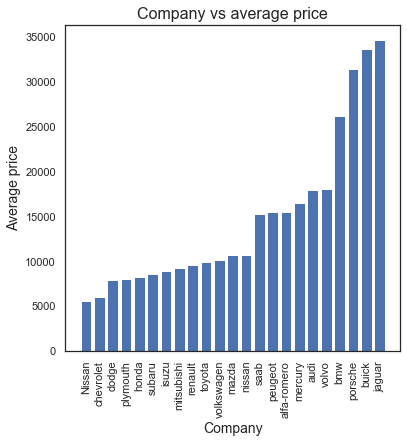

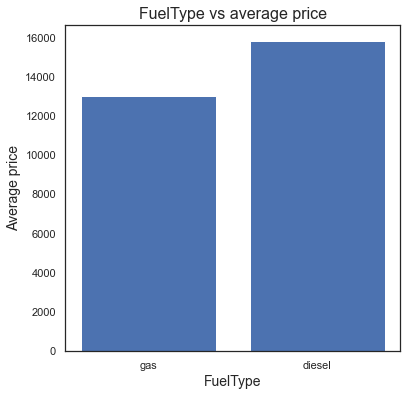

In [16]:
show_barchart(carbody_ser,'Carbody vs average price','Carbody','Average price')
show_barchart(company_ser,'Company vs average price','Company','Average price',90)
show_barchart(fueltype_ser,'FuelType vs average price','FuelType','Average price')

- Toyota là hãng xe chiếm thị phần cao nhất.
- Loại thân xe Sedan, hatchback bán chạy nhất.
- Xe sử dụng loại nhiên liệu gas bán chạy hơn nhiều so với xe sử dụng loại nhiên liệu diesel.
- Jaguar và Buick có giá trị trung bình cao nhất.
- Hardtop và Convertible có giá trung bình cao hơn các loại khác.

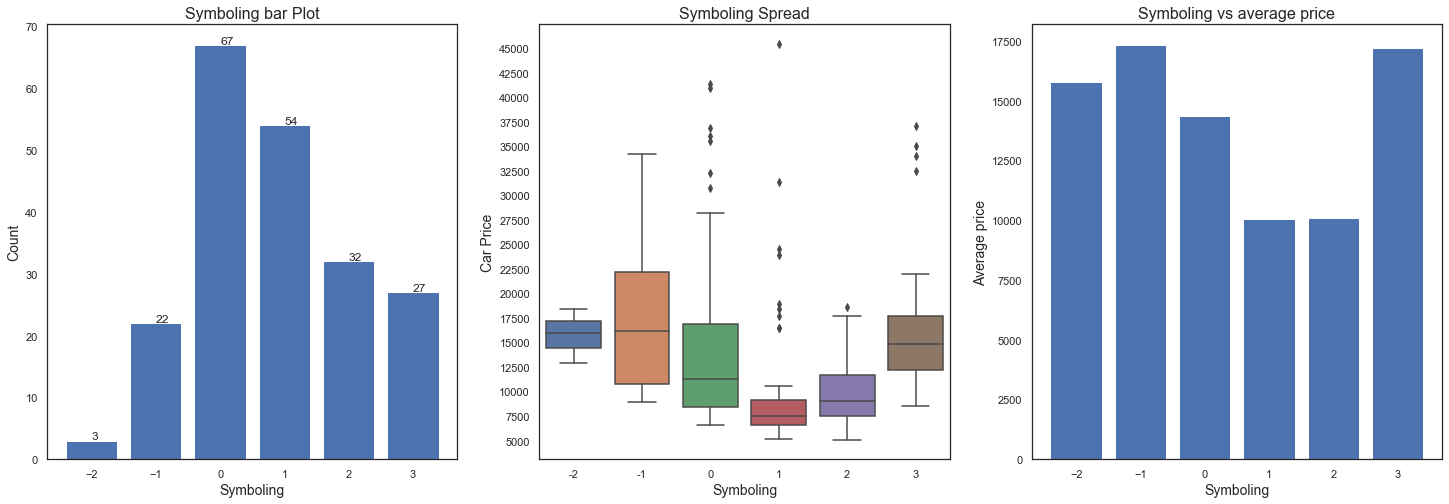

In [17]:
sns.set_theme(style = 'white')

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Symboling bar Plot',fontsize = 16)
symbol_count = cars.symboling.value_counts().to_dict()
pathcher =plt.bar(list(symbol_count.keys()),list(symbol_count.values()))
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Symboling',fontsize = 14)
plt.ylabel('Count',fontsize = 14)


plt.subplot(1,3,2) 
plt.title('Symboling Spread',fontsize = 16) 
sns.boxplot(x=cars.symboling,y=cars.price)
plt.yticks([i for i in range(5000,47500,2500)])
plt.xlabel('Symboling',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.subplot(1,3,3) 
symboling_ser = cars.groupby(['symboling'])['price'].mean().sort_values()
plt.bar(list(symboling_ser.index),list(symboling_ser.values))
plt.title('Symboling vs average price',fontsize = 16)
plt.xlabel('Symboling',fontsize = 14)
plt.ylabel('Average price',fontsize = 14)

plt.show()



- Đa số các hãng xe sản xuất xe có mức độ an toàn Symboling nằm khoảng 0 đến 1.

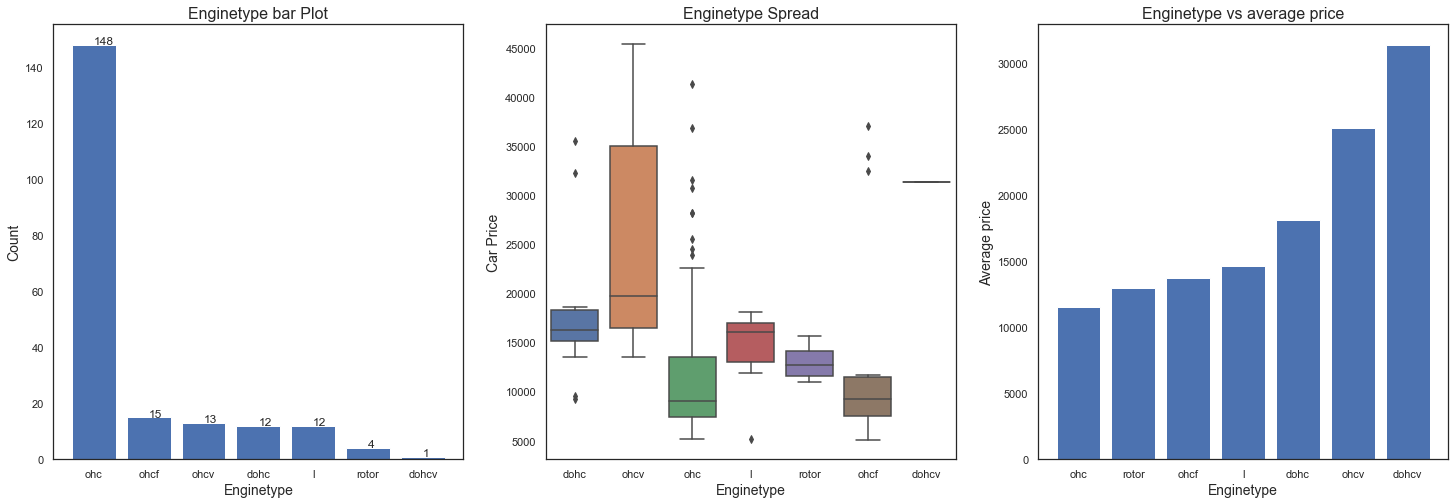

In [18]:
sns.set_theme(style = 'white')

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Enginetype bar Plot',fontsize = 16)
enginetype_count = cars.enginetype.value_counts().to_dict()
pathcher =plt.bar(list(enginetype_count.keys()),list(enginetype_count.values()))
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Enginetype',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Enginetype Spread',fontsize = 16) 
sns.boxplot(x=cars.enginetype,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Enginetype',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.subplot(1,3,3) 
enginetype_ser = cars.groupby(['enginetype'])['price'].mean().sort_values()
plt.bar(list(enginetype_ser.index),list(enginetype_ser.values))
plt.title('Enginetype vs average price',fontsize = 16)
plt.xlabel('Enginetype',fontsize = 14)
plt.ylabel('Average price',fontsize = 14)

plt.show()

- Loại động cơ OHC được ưa thích nhất
- Loại động cơ OHCV có khoảng giá cao nhất
- Loại động cơ OHC và OHCF có khoảng giá thấp nhất

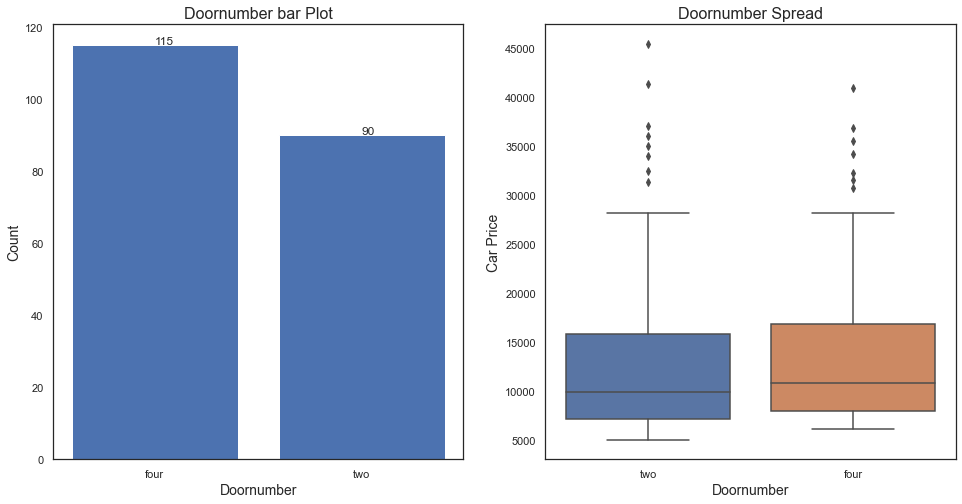

In [19]:
sns.set_theme(style = 'white')

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Doornumber bar Plot',fontsize = 16)
doornumber_count = cars.doornumber.value_counts().to_dict()
pathcher =plt.bar(list(doornumber_count.keys()),list(doornumber_count.values()))
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Doornumber',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Doornumber Spread',fontsize = 16) 
sns.boxplot(x=cars.doornumber,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Doornumber',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.show()

- Không có sự ảnh hưởng giữa giá xe và biến doornumber

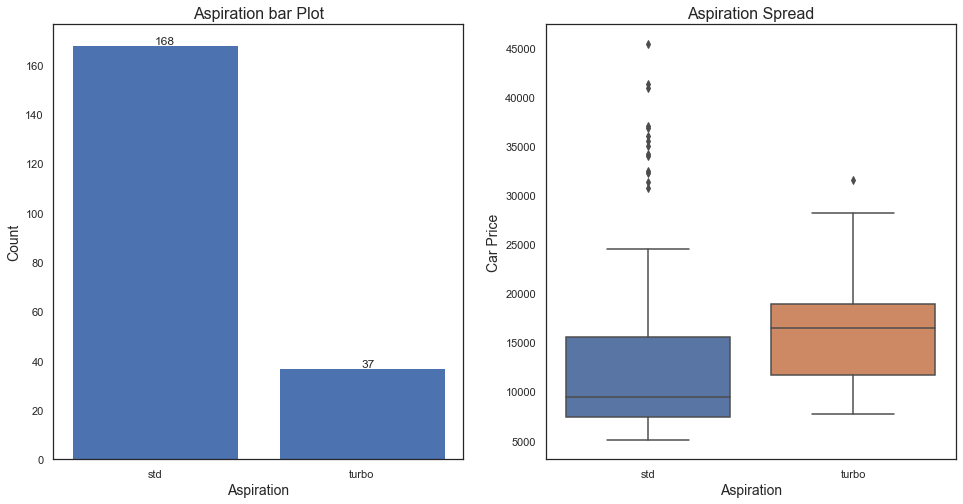

In [20]:
sns.set_theme(style = 'white')

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Aspiration bar Plot',fontsize = 16)
aspiration_count = cars.aspiration.value_counts().to_dict()
pathcher =plt.bar(list(aspiration_count.keys()),list(aspiration_count.values()))
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Aspiration',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Aspiration Spread',fontsize = 16) 
sns.boxplot(x=cars.aspiration,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Aspiration',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.show()

- Loại hút Turbo mặc dù số lượng trên thị trường không nhiều như std nhưng mức giá vẫn có phần nhỉnh hơn.

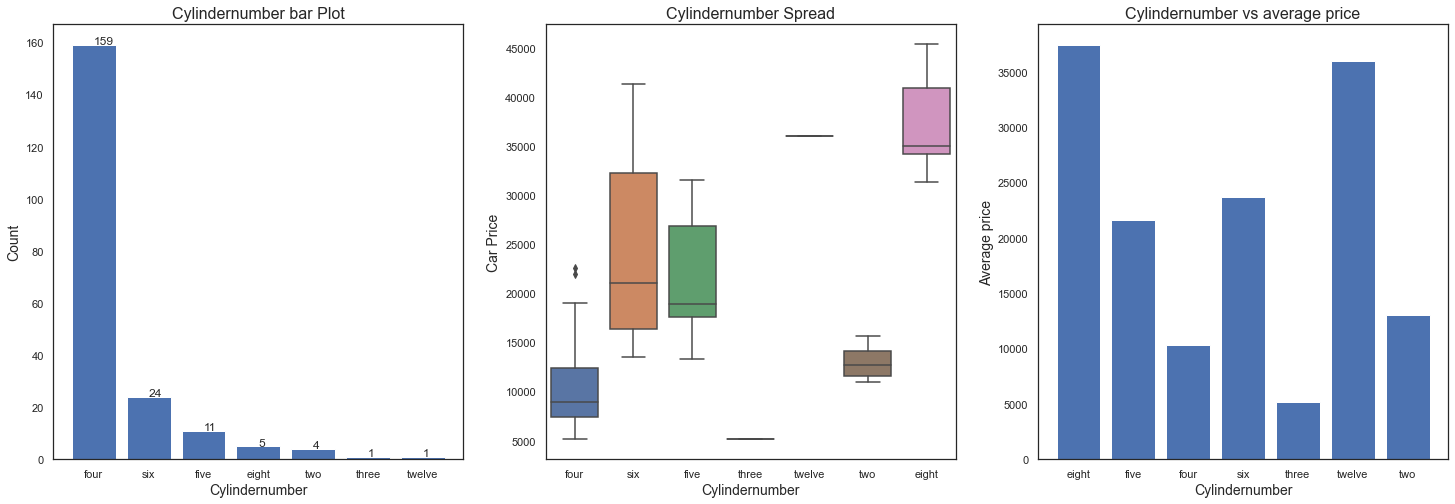

In [21]:
sns.set_theme(style = 'white')

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Cylindernumber bar Plot',fontsize = 16)
cylindernumber_count = cars.cylindernumber.value_counts().to_dict()
pathcher =plt.bar(list(cylindernumber_count.keys()),list(cylindernumber_count.values()))
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Cylindernumber',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Cylindernumber Spread',fontsize = 16) 
sns.boxplot(x=cars.cylindernumber,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Cylindernumber',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.subplot(1,3,3) 
cylindernumber_ser = cars.groupby(['cylindernumber'])['price'].mean()
plt.bar(list(cylindernumber_ser.index),list(cylindernumber_ser.values))
plt.title('Cylindernumber vs average price',fontsize = 16)
plt.xlabel('Cylindernumber',fontsize = 14)
plt.ylabel('Average price',fontsize = 14)
plt.show()

- Số lượng xi lanh phổ biến là 4,6,5 (theo thứ tự giảm dần) nhưng thấy số lượng xi lanh càng nhiều thì giá càng cao.

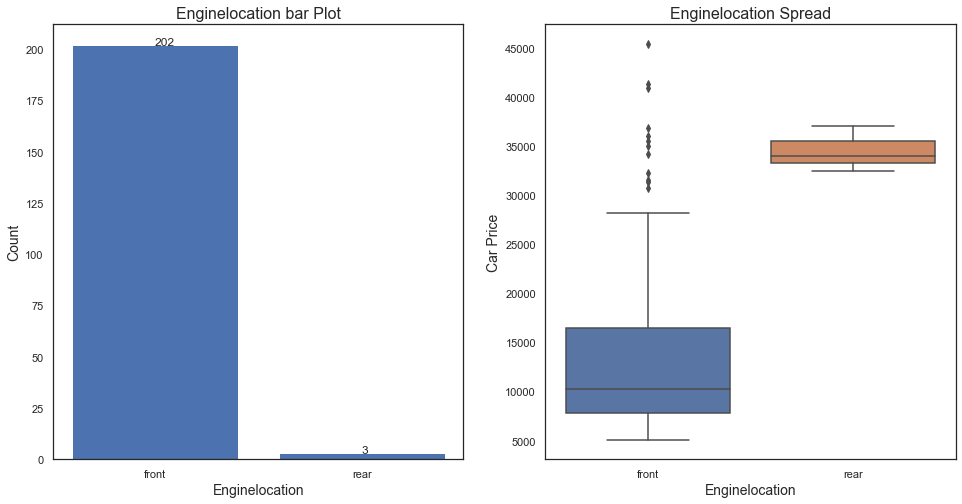

In [22]:
sns.set_theme(style = 'white')

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Enginelocation bar Plot',fontsize = 16)
enginelocation_count = cars.enginelocation.value_counts().to_dict()
pathcher =plt.bar(list(enginelocation_count.keys()),list(enginelocation_count.values()))
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Enginelocation',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Enginelocation Spread',fontsize = 16) 
sns.boxplot(x=cars.enginelocation,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Enginelocation',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.show()

- Quá ít dữ liệu về enginelocation để kết luận, nhưng một vài chiều xe bố trí động cơ ở phía sau thì nằm ở mức giá cao

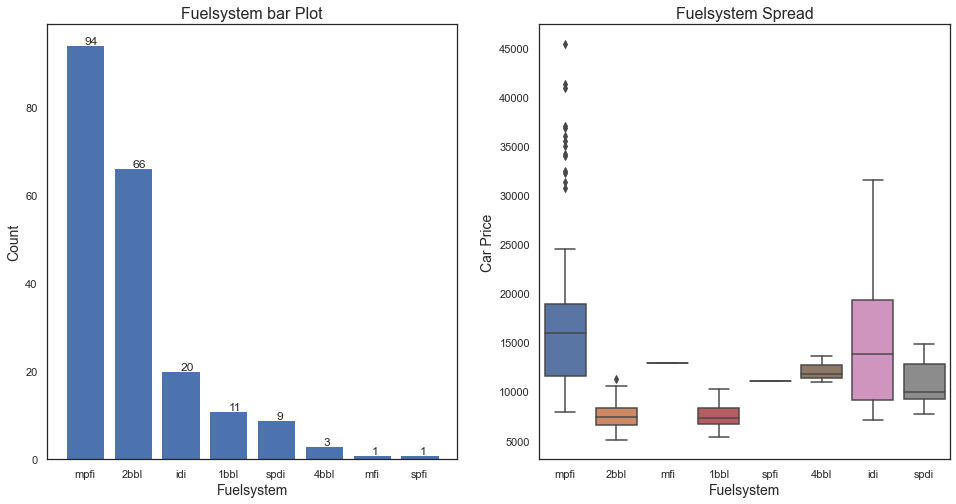

In [23]:
sns.set_theme(style = 'white')

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Fuelsystem bar Plot',fontsize = 16)
fuelsystem_count = cars.fuelsystem.value_counts().to_dict()
pathcher =plt.bar(list(fuelsystem_count.keys()),list(fuelsystem_count.values()))
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Fuelsystem',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Fuelsystem Spread',fontsize = 16) 
sns.boxplot(x=cars.fuelsystem,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Fuelsystem',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.show()

- Hệ thống nhiên liệu mpfi và 2bbl được ưa chuộng nhất

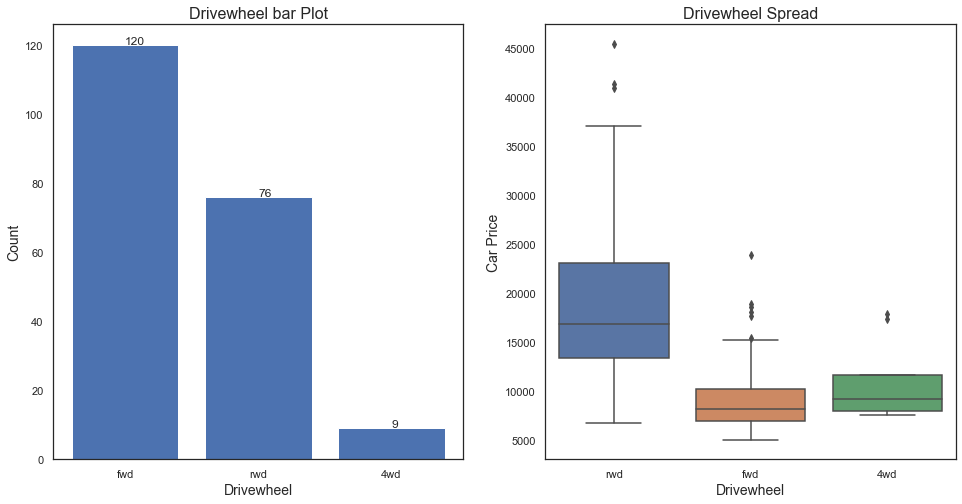

In [24]:
sns.set_theme(style = 'white')

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('Drivewheel bar Plot',fontsize = 16)
drivewheel_count = cars.drivewheel.value_counts().to_dict()
pathcher =plt.bar(list(drivewheel_count.keys()),list(drivewheel_count.values()))
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Drivewheel',fontsize = 14)
plt.ylabel('Count',fontsize = 14)

plt.subplot(1,3,2) 
plt.title('Drivewheel Spread',fontsize = 16) 
sns.boxplot(x=cars.drivewheel,y=cars.price)
plt.yticks([i for i in range(5000,47500,5000)])
plt.xlabel('Drivewheel',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)

plt.show()

Hầu hết các chiếc xe có mức giá tầm cao đều sử dụng loại bánh xe rwd

### 3. Các thuộc tính định lượng

#### 3.1 Các thông số về kích thước xe:
- carlenght
- carwidth
- carheight
- curbweight

In [25]:
def scatter(property,fig):
    plt.subplot(2,2,fig)
    plt.scatter(cars[property],cars['price'])
    # df = cars[[property,'price']]
    # sns.lmplot(x=property,y='price',data=df)
    plt.title(property + ' vs Price',fontsize = 16)
    plt.xlabel(property,fontsize=14)
    plt.ylabel('Price',fontsize=14)


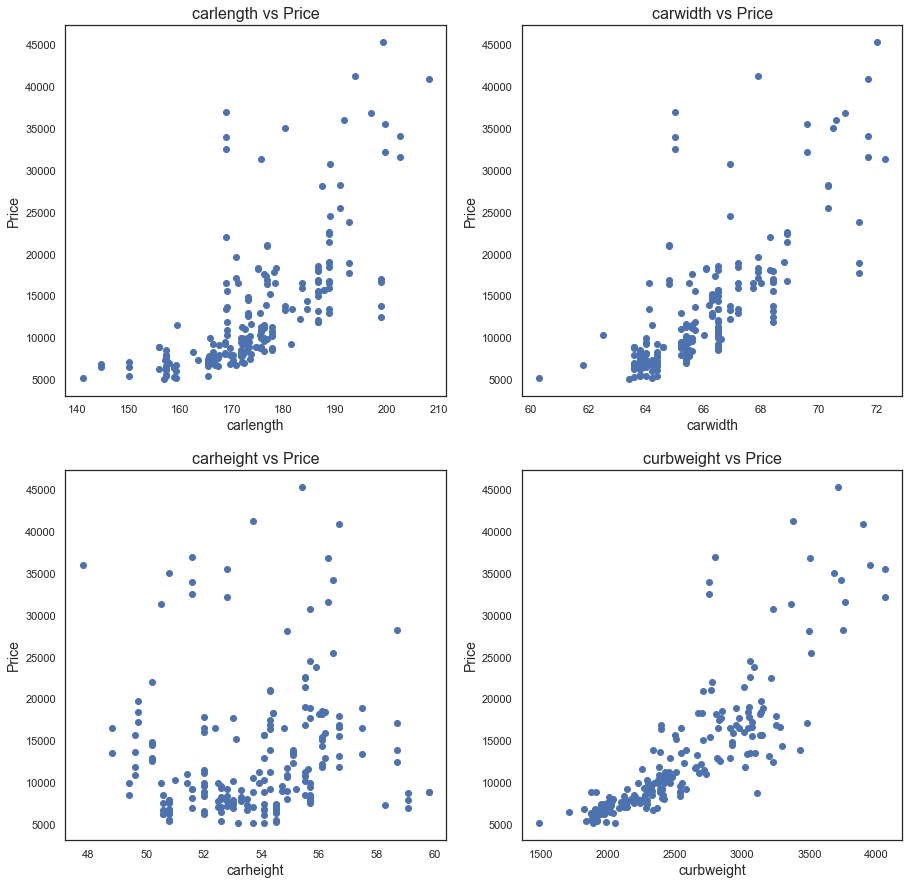

In [26]:
plt.figure(figsize=(15,15))

scatter('carlength',1)
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)
plt.show()

- carlenght, carwidth, curbweight có mối tương quan với giá xe

- carheight không thể hiện tương quan với giá xe


In [27]:
def pearsonr2property(p1,p2):
    print(p1,p2,sep='\t')
    r, pvalue = pearsonr(cars[p1], cars[p2])
    print ('r =', r)
    print ('pvalue =',pvalue)
    if pvalue > 0.05:
        print(f'2 thuộc tính {p1} và {p2} không tương quan với nhau')
    else:
        if r > 0:
            print(f'2 thuộc tính {p1} và {p2} tương quan thuận với nhau')
        elif r < 0:
            print(f'2 thuộc tính {p1} và {p2} tương quan nghịch với nhau')
        else:
            print(f'2 thuộc tính {p1} và {p2} không tương quan với nhau')
    print()

In [28]:
pearsonr2property('carlength','price')
pearsonr2property('carwidth','price')
pearsonr2property('carheight','price')
pearsonr2property('curbweight','price')

carlength	price
r = 0.682920015677962
pvalue = 1.6787066240748032e-29
2 thuộc tính carlength và price tương quan thuận với nhau

carwidth	price
r = 0.7593252997415115
pvalue = 9.627437876119843e-40
2 thuộc tính carwidth và price tương quan thuận với nhau

carheight	price
r = 0.11933622657049447
pvalue = 0.08832832352275669
2 thuộc tính carheight và price không tương quan với nhau

curbweight	price
r = 0.8353048793372968
pvalue = 1.214444826403117e-54
2 thuộc tính curbweight và price tương quan thuận với nhau



In [29]:
pearsonr2property('carlength','carwidth')
pearsonr2property('carlength','curbweight')

carlength	carwidth
r = 0.8411182684818449
pvalue = 4.332386050436918e-56
2 thuộc tính carlength và carwidth tương quan thuận với nhau

carlength	curbweight
r = 0.8777284608306425
pvalue = 8.728145747823358e-67
2 thuộc tính carlength và curbweight tương quan thuận với nhau



#### 3.2 Các thuộc tính khác

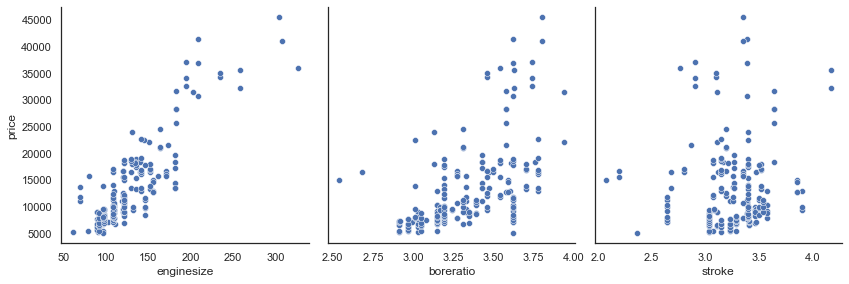

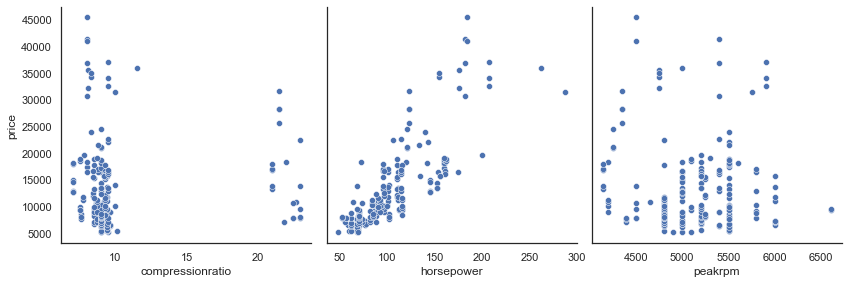

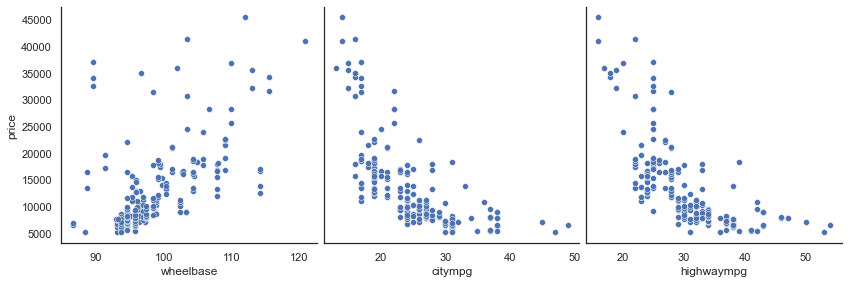

In [30]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

In [31]:
properties = ['enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm','wheelbase', 'citympg', 'highwaympg']
for property in properties:
    pearsonr2property(property,'price')

enginesize	price
r = 0.8741448025245117
pvalue = 1.3547637598648423e-65
2 thuộc tính enginesize và price tương quan thuận với nhau

boreratio	price
r = 0.5531732367984437
pvalue = 7.907922278249421e-18
2 thuộc tính boreratio và price tương quan thuận với nhau

stroke	price
r = 0.079443083881931
pvalue = 0.25751371590910366
2 thuộc tính stroke và price không tương quan với nhau

compressionratio	price
r = 0.06798350579944261
pvalue = 0.3327723612238313
2 thuộc tính compressionratio và price không tương quan với nhau

horsepower	price
r = 0.8081388225362216
pvalue = 1.4834365732941758e-48
2 thuộc tính horsepower và price tương quan thuận với nhau

peakrpm	price
r = -0.08526715027785686
pvalue = 0.22414123444667844
2 thuộc tính peakrpm và price không tương quan với nhau

wheelbase	price
r = 0.5778155982921502
pvalue = 1.1828204863377837e-19
2 thuộc tính wheelbase và price tương quan thuận với nhau

citympg	price
r = -0.68575133602704
pvalue = 7.978684249663408e-30
2 thuộc tính citympg và 

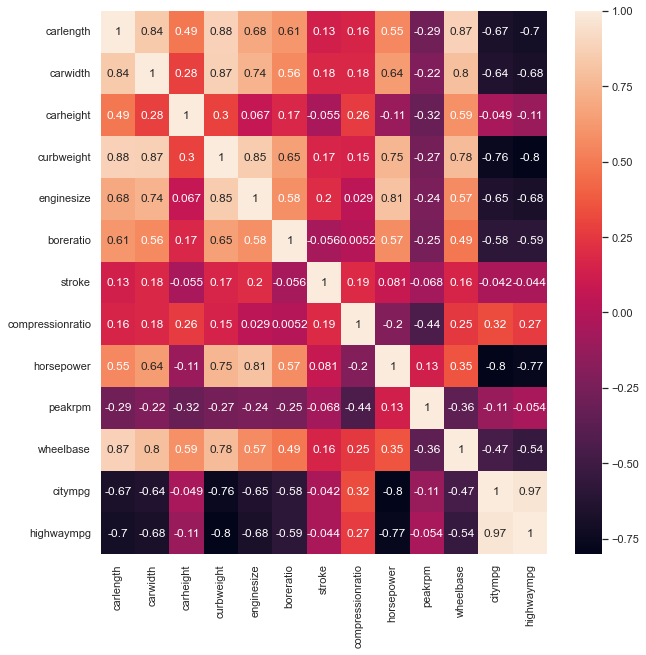

In [32]:
column=['carlength','carwidth','carheight','curbweight','enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm','wheelbase', 'citympg', 'highwaympg']
cars_cor = cars[column].corr()

plt.figure(figsize=(10,10))
sns.heatmap(cars_cor, annot=True)
plt.show()

- 2 biến citympg và highwaympg tương quan chặt chẽ với nhau

### Danh sách các tham số quan trọng:

- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 

In [33]:
cars_sub = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                'carlength','carwidth',]]
cars_sub.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


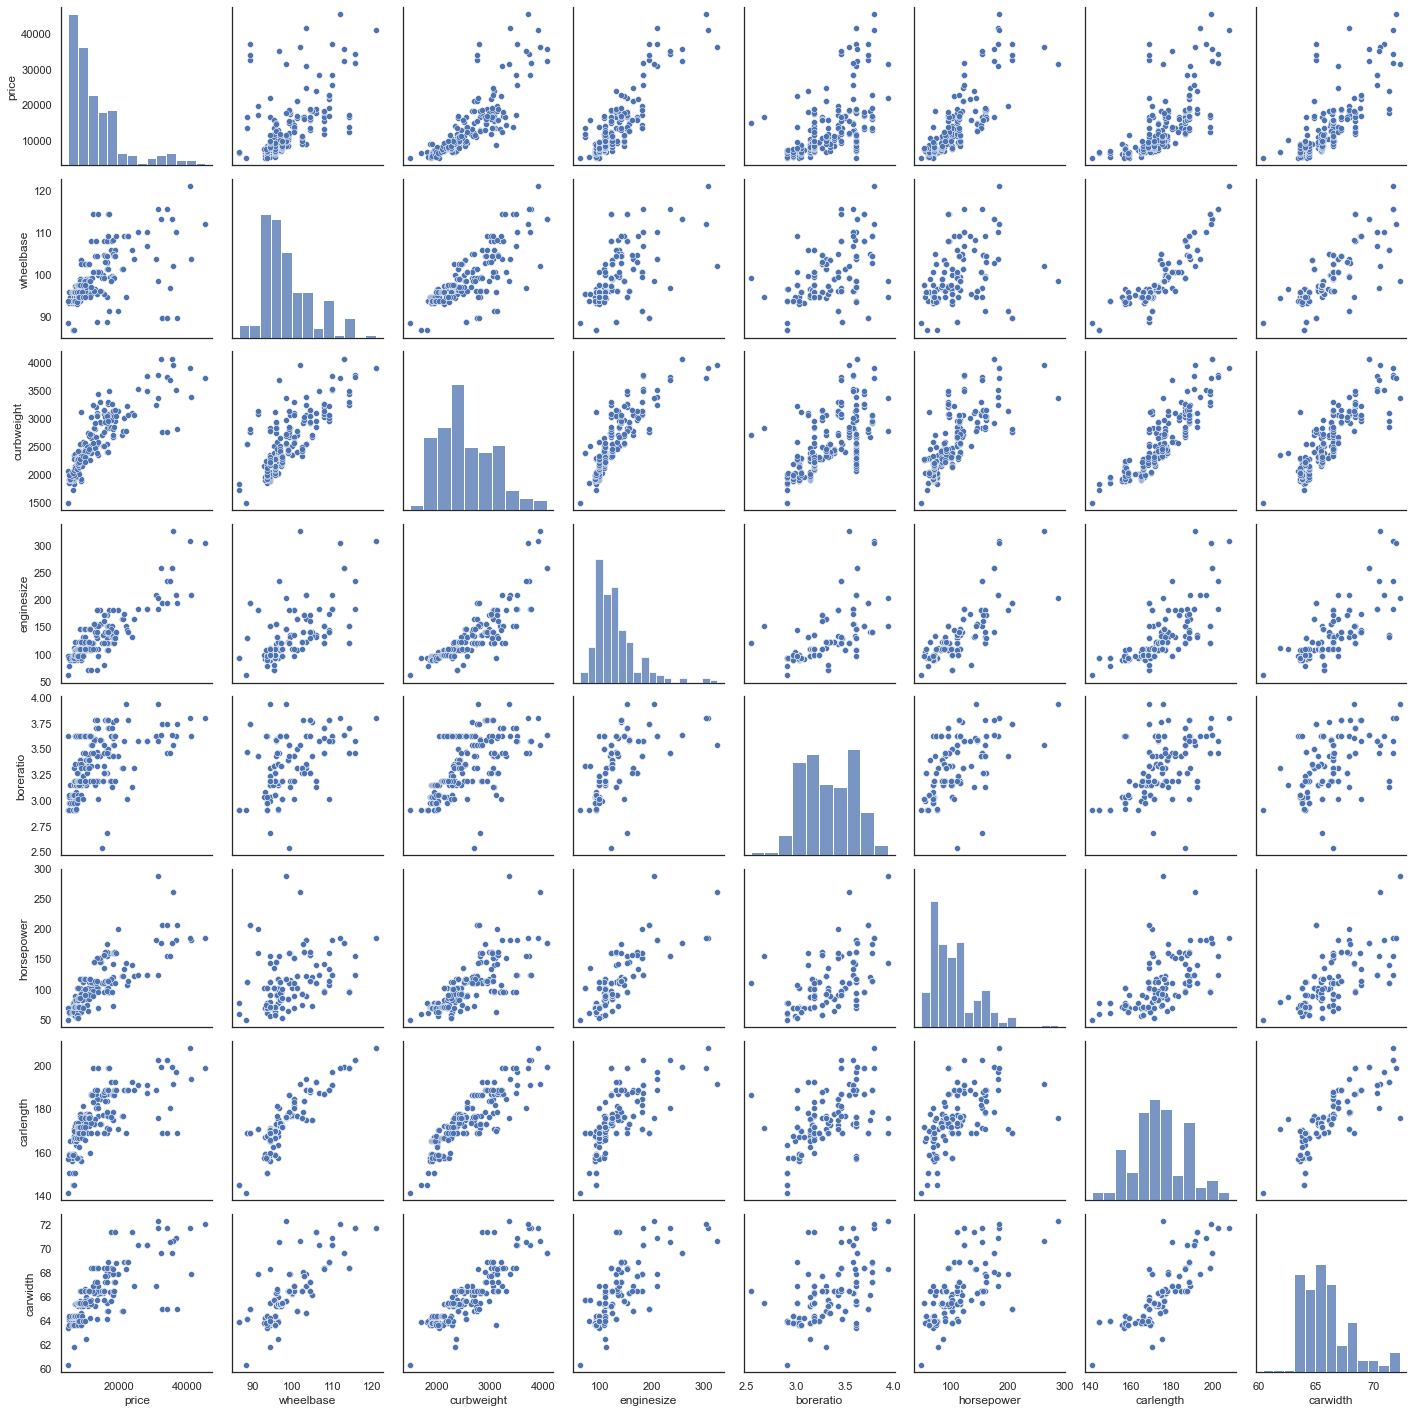

In [34]:
sns.pairplot(cars_sub)
plt.show()

In [35]:
cars_sub['fueltype']


0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fueltype, Length: 205, dtype: object

In [36]:
def CreateDummies(property2dum,df,drop_first_bool=False):
    dummies = pd.get_dummies(df[property2dum],prefix=property2dum,drop_first = drop_first_bool)
    df = pd.concat([df, dummies], axis=1)
    df.drop([property2dum],axis=1,inplace=True)
    return df

In [37]:
print('fueltype',len(cars_sub['fueltype'].unique()),sep='\t')
print('aspiration',len(cars_sub['aspiration'].unique()),sep='\t')
print('carbody',len(cars_sub['carbody'].unique()),sep='\t')
print('drivewheel',len(cars_sub['drivewheel'].unique()),sep='\t')
print('enginetype',len(cars_sub['enginetype'].unique()),sep='\t')
print('cylindernumber',len(cars_sub['cylindernumber'].unique()),sep='\t')

fueltype	2
aspiration	2
carbody	5
drivewheel	3
enginetype	7
cylindernumber	7


- Giảm bớt số lượng thuộc tính thì những thuộc tính chỉ có 2 giá trị bỏ bớt 1 cột

In [38]:
cars_sub = CreateDummies('fueltype',cars_sub,True)
cars_sub = CreateDummies('aspiration',cars_sub,True)
cars_sub = CreateDummies('carbody',cars_sub)
cars_sub = CreateDummies('drivewheel',cars_sub)
cars_sub = CreateDummies('enginetype',cars_sub)
cars_sub = CreateDummies('cylindernumber',cars_sub)

In [39]:
cars_sub.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,1,0,...,0,1,0,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,1,0,...,0,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,1,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
columncount = len(cars_sub.columns)

In [41]:
X = cars_sub.iloc[:,1:].values.reshape(-1,columncount-1)
X

array([[  88.6, 2548. ,  130. , ...,    0. ,    0. ,    0. ],
       [  88.6, 2548. ,  130. , ...,    0. ,    0. ,    0. ],
       [  94.5, 2823. ,  152. , ...,    0. ,    0. ,    0. ],
       ...,
       [ 109.1, 3012. ,  173. , ...,    0. ,    0. ,    0. ],
       [ 109.1, 3217. ,  145. , ...,    0. ,    0. ,    0. ],
       [ 109.1, 3062. ,  141. , ...,    0. ,    0. ,    0. ]])

In [42]:
y = cars_sub.iloc[:,0]
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [43]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

m_model = LinearRegression()
m_model.fit(X,y.ravel())

LinearRegression()

In [44]:
print(m_model.intercept_)
print(m_model.coef_)

-31473.739045238228
[ 7.11868265e+01  2.95772122e+00  3.60515359e+01 -2.23045188e+03
  8.68164322e+01 -5.13496981e+01  5.41870006e+02 -2.42309349e+03
 -1.13923342e+03  3.20409485e+03 -5.24000004e+02 -1.43503302e+03
 -1.33690526e+02 -1.11137130e+03 -7.45466519e+02 -4.48226332e+02
  1.19369285e+03  1.61907725e+03 -1.55114508e+04  3.79512932e+03
  5.62564594e+03  7.04035946e+03 -3.38214694e+03  8.13385773e+02
  1.04009769e+04 -3.48560202e+03 -5.78070175e+03 -1.34471087e+03
  1.13692153e+03 -1.74026952e+03  8.13385773e+02]


In [45]:
rfe = RFE(m_model, n_features_to_select=10)
rfe = rfe.fit(X, y)

- 'rfe.ranking_' là một thuộc tính của đối tượng RFE (Recursive Feature Elimination) trong thư viện scikit-learn. Nó là một mảng số nguyên, mỗi giá trị trong mảng tương ứng với một thuộc tính trong tập dữ liệu và cho biết thứ tự ưu tiên của thuộc tính đó. Giá trị nhỏ hơn tương ứng với thuộc tính ưu tiên cao hơn.

Ví dụ, nếu rfe.ranking_ có giá trị [1, 2, 3, 4], thì thuộc tính đầu tiên (với chỉ số 0) sẽ được ưu tiên cao nhất, thuộc tính thứ hai (với chỉ số 1) sẽ được ưu tiên thứ hai, v.v.

- 'rfe.support_' là một thuộc tính của đối tượng RFE (Recursive Feature Elimination) trong thư viện scikit-learn. Nó là một mảng giá trị boolean, mỗi giá trị trong mảng tương ứng với một thuộc tính trong tập dữ liệu và cho biết xem thuộc tính đó có được giữ lại hay không. Giá trị True tương ứng với thuộc tính được giữ lại, còn giá trị False tương ứng với thuộc tính bị loại bỏ.

Ví dụ, nếu rfe.support_ có giá trị [True, False, True, False], thì hai thuộc tính đầu tiên và thứ ba sẽ được giữ lại trong tập dữ liệu, còn hai thuộc tính còn lại sẽ bị loại bỏ.

In [46]:
feature_selection = list(zip(cars_sub.columns,rfe.support_,rfe.ranking_))


In [47]:
rfe.ranking_.max()

22

In [48]:
for selection in feature_selection:
    if selection[1]:
        print(selection[0], selection[2],sep='\t\t')

enginesize		1
enginetype_dohc		1
enginetype_ohcf		1
enginetype_ohcv		1
enginetype_rotor		1
cylindernumber_eight		1
cylindernumber_five		1
cylindernumber_six		1
cylindernumber_three		1
cylindernumber_twelve		1
